In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Import Data

In [2]:
df = pd.read_excel("../spring21_data/fa_stats_v2.xlsx")

# Feature Cleaning

In [3]:
numerical = ['age',
       'games_played', 'minutes_played', 
       'player_efficiency_rating', 'true_shooting_percentage',
       'three_point_attempt_rate', 'free_throw_attempt_rate',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'assist_percentage', 'steal_percentage',
       'block_percentage', 'turnover_percentage', 'usage_percentage',
       'offensive_win_shares', 'defensive_win_shares',
       'win_shares_per_48_minutes', 'offensive_box_plus_minus',
       'defensive_box_plus_minus',
       'value_over_replacement_player','O-LEBRON', 'D-LEBRON', 'Wins Added', 'ORPM', 'DRPM', 'poss',
       'raptor_offense', 'raptor_defense', 'war_total', 'war_reg_season',
       'war_playoffs', 'predator_offense', 'predator_defense', 'pace_impact',
       'LA_RAPM__Def', 'LA_RAPM__Off', 'RA_EFG__Def', 'RA_EFG__Off',
       'RA_FTR__Def', 'RA_FTR__Off', 'RA_ORBD__Def', 'RA_ORBD__Off',
       'RA_TOV__Def', 'RA_TOV__Off', 'RAPM__Def', 'RAPM__Off']

categorical = ["Type"]
other = [col for col in df.columns.values if (col not in categorical+numerical+["cap_space_usage"])]
dum_df = pd.get_dummies(df, columns=categorical) # convert the categorical features into dummy features (numerical)

In [4]:
df = dum_df.drop(columns=other) # drop the non-feature columns
df.dropna(inplace=True) # drop all rows with a null value (there should be none)

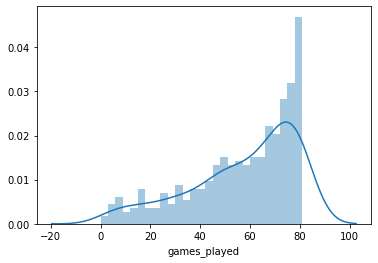

In [5]:
sns.distplot(df['games_played'], bins=np.arange(0, 82, 3))

In [6]:
df = df[df['games_played'] >= 20]

Split the dataset into training set, validation set, and test set (this is for the final run)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns=["cap_space_usage"])
y = df["cap_space_usage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=22)

In [9]:
X.to_excel("X.xlsx")
y.to_excel("y.xlsx")

In [10]:
# scale the numerical features only (this leaves out the dummy features from earlier)
from sklearn.preprocessing import StandardScaler
features = numerical
scaler = StandardScaler()

X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])
X_val[features] = scaler.transform(X_val[features])

<ipython-input-10-130c03cd7c68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[features] = scaler.transform(X_test[features])
C:\Users\Rishab\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


# Feature Selection

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(f_regression, k=20)

best_features = select.fit_transform(X_train, y_train)
feature_scores = pd.concat([pd.Series(X_train.columns), pd.Series(select.scores_)], axis=1)
feature_scores.columns = ["features", "score"]

In [12]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [13]:
feature_scores.sort_values(by=["score"], ascending=False)

,features,score
2,Wins Added,412.749795
45,value_over_replacement_player,367.802073
5,poss,305.478896
8,war_total,284.503305
40,offensive_win_shares,279.662552
9,war_reg_season,274.894459
43,offensive_box_plus_minus,249.591820
28,minutes_played,238.535313
11,predator_offense,197.095008
41,defensive_win_shares,185.006608


Since this is the baseline model I decided just to use these features and call it a day for now.

In [14]:
features = list(feature_scores.sort_values(by=["score"], ascending=False).head(10)['features'])

In [15]:
X_train = X_train[features]
X_test = X_test[features]
X_val = X_val[features]

In [16]:
X_train.to_excel("training_set.xlsx")
X_test.to_excel("test_set.xlsx")
X_val.to_excel("validation_set.xlsx")

### helper functions

run(model, model_name, x_train, x_val) fits the model on the training set, evaluates the fit on the training set and on the validation set. 

evaluate(y_pred, y_test) prints out the evaluation metrics of a prediction.

In [17]:
def run(model, model_name, x_train, x_val):
    """ Fits the model and prints out results from calling evaluate on the training and validation set
        parameters:
            model
                the unfitted model, from sklearn (has to have a fit and predict method)
            model_name
                String, the name of the model
            x_train
                DataFrame, the training set
            x_val
                DataFrame, the validation set
                
        returns:
            nothing
        
    """
    model = model.fit(x_train, y_train)
    y_pred = np.clip(model.predict(x_train), 0, 1000) # since negative results are meaningless
    
    print("[{0}] These are the results for the training set.".format(model_name))
    
    evaluate(y_pred, y_train)
    print("--------------------------------------")
    
    print("[{0}] These are the results for the validation set.".format(model_name))
    y_pred = np.clip(model.predict(x_val), 0, 1000) # since negative results are meaningless
    
    evaluate(y_pred, y_val)
    
    print("_____________________________________________")

In [18]:
def evaluate(y_pred, y_test):
    """ Prints out the evaluation metrics of the experiment
        parameters:
            y_pred
                DataFrame or array-like, the predictions
            y_test
                DataFrame or array-like, the actual y-values
                
            these two parameters must have the same dimensions
    """
    print("r^2: ", r2_score(y_test, y_pred))
    print("mse: ", mean_squared_error(y_test, y_pred))
    print("variance_score: ", explained_variance_score(y_test, y_pred))
    print("mse-log: ", mean_squared_log_error(y_test, y_pred))

Here I'm trying those five linear models without any tuning and testing the performance.

In [19]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LassoLarsCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error

lstsq = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(max_iter=5000, random_state = 0)
elasticNet = ElasticNetCV(n_alphas = 1000)
lassoLars = LassoLarsCV()

run(ridge, "Ridge", X_train, X_val)
run(lstsq, "Least Squares", X_train,  X_val)
run(lasso, "Lasso", X_train,  X_val)
run(elasticNet, "ElasticNetCV", X_train,  X_val)
run(lassoLars, "Lasso LARS", X_train,  X_val)

[Ridge] These are the results for the training set.
r^2:  0.6977525052407192
mse:  0.0020822437394088698
variance_score:  0.6977684466127145
mse-log:  0.001661476534898258
--------------------------------------
[Ridge] These are the results for the validation set.
r^2:  0.30575372106004917
mse:  0.0028033871694716477
variance_score:  0.3199591718345355
mse-log:  0.0023192116872365045
_____________________________________________
[Least Squares] These are the results for the training set.
r^2:  0.6998847811861131
mse:  0.0020675540618599305
variance_score:  0.699901408339862
mse-log:  0.00164959468539904
--------------------------------------
[Least Squares] These are the results for the validation set.
r^2:  0.2756322714214485
mse:  0.0029250184810167014
variance_score:  0.2923546079318694
mse-log:  0.002407168218229781
_____________________________________________
[Lasso] These are the results for the training set.
r^2:  0.6962999914173298
mse:  0.0020922503990755317
variance_score:  

Here I'm transforming the datasets to include quadratic features (eecs16b). This means that for feature: points, the PolynomialFeatures transformer will add a column of points-squared to the dataset.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_trainPF = poly.fit_transform(X_train)
X_valPF = poly.transform(X_val)
X_valPF = poly.transform(X_val)

lstsq = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(max_iter=50000, random_state = 0)
elasticNet = ElasticNetCV(max_iter=50000, n_alphas = 1000)
lassoLars = LassoLarsCV()

run(ridge, "Ridge", X_trainPF, X_valPF)
run(lstsq, "Least Squares", X_trainPF, X_valPF)
run(lasso, "Lasso", X_trainPF, X_valPF)
run(elasticNet, "ElasticNetCV", X_trainPF, X_valPF)
run(lassoLars, "Lasso LARS", X_trainPF, X_valPF)

[Ridge] These are the results for the training set.
r^2:  0.7612518279466305
mse:  0.0016447841427085154
variance_score:  0.7612518279466305
mse-log:  0.001319475137171049
--------------------------------------
[Ridge] These are the results for the validation set.
r^2:  0.27211642533534175
mse:  0.0029392155723179016
variance_score:  0.2890151073772065
mse-log:  0.002437794964021713
_____________________________________________
[Least Squares] These are the results for the training set.
r^2:  0.7916773026424051
mse:  0.0014351769323848165
variance_score:  0.7916778209109567
mse-log:  0.0011557015325126564
--------------------------------------
[Least Squares] These are the results for the validation set.
r^2:  0.29318076712036223
mse:  0.00285415713227317
variance_score:  0.31356579429738873
mse-log:  0.002412219631972664
_____________________________________________
[Lasso] These are the results for the training set.
r^2:  0.7232384127816792
mse:  0.001906666200006658
variance_score: 

Since these results are much better (except least squares), we're probably going to need to look beyond just linear-models.

**To put the result of baseline model into contexts, we also need to look into data entries manually to do some sanity checks**

In [21]:
train_indexes = X_train.index

In [22]:
sanity_check_train_df = dum_df.iloc[train_indexes][['key', 'cap_space_usage', 'Wins Added', 'value_over_replacement_player',
                                                      'war_total', 'win_shares','salary']]
sanity_check_train_df['val_cap_usage'] = elasticNet.predict(X_trainPF)
sanity_check_train_df['diff'] = sanity_check_train_df['val_cap_usage'] - sanity_check_train_df['cap_space_usage']

In [23]:
training_set = sanity_check_train_df.sort_values('diff', ascending=False)

In [24]:
validation_indexes = X_val.index

In [25]:
sanity_check_val_df = dum_df.iloc[validation_indexes][['key', 'cap_space_usage', 'Wins Added', 'value_over_replacement_player',
                                                      'war_total', 'win_shares']]
sanity_check_val_df['val_cap_usage'] = elasticNet.predict(X_valPF)
sanity_check_val_df['diff'] = sanity_check_val_df['val_cap_usage'] - sanity_check_val_df['cap_space_usage']

In [26]:
validation_set = sanity_check_val_df.sort_values('diff', ascending=False)
validation_set['category'] = validation_set['diff'].apply(lambda x: 'Increase' if x >= 0.015 else 'Decrease' if x <= -0.015 else 'Match')
validation_set['abs_diff'] = abs(validation_set['diff'])

In [27]:
training_set[['key', 'cap_space_usage', 'val_cap_usage', 'diff']].head(25)

,key,cap_space_usage,val_cap_usage,diff
163,Derrick Rose2017,0.013691,0.111231,0.097539
230,DeMarcus Cousins2018,0.052391,0.142536,0.090145
236,Jeff Green2018,0.023500,0.104656,0.081156
229,Dirk Nowitzki2018,0.049083,0.125570,0.076488
246,Yogi Ferrell2018,0.029450,0.103761,0.074312
15,David West2016,0.016482,0.090295,0.073813
50,Raymond Felton2016,0.016482,0.088248,0.071766
299,Danny Green2019,0.134086,0.204253,0.070167
158,Tony Allen2017,0.014848,0.084473,0.069624
237,Brook Lopez2018,0.033200,0.102245,0.069046


In [28]:
validation_set[['key', 'cap_space_usage', 'val_cap_usage', 'diff']].head(25)

,key,cap_space_usage,val_cap_usage,diff
293,Willie Cauley-Stein2019,0.019951,0.155644,0.135692
294,Brook Lopez2019,0.110803,0.225175,0.114372
182,Brandon Jennings2017,0.002999,0.078075,0.075076
20,Jared Sullinger2016,0.059781,0.131246,0.071465
70,Dion Waiters2016,0.030783,0.100069,0.069286
243,Shabazz Napier2018,0.019068,0.077094,0.058026
298,Kevon Looney2019,0.040904,0.098803,0.057899
220,Julius Randle2018,0.084825,0.134083,0.049258
141,Andre Roberson2017,0.093440,0.134221,0.040781
78,Gerald Green2016,0.014984,0.049803,0.034820


**The following is for visualization**

In [29]:
from adjustText import adjust_text

ModuleNotFoundError: No module named 'adjustText'

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})

In [ ]:
sns.scatterplot(data=training_set, x="value_over_replacement_player", y="val_cap_usage", hue='win_shares',
                size='diff', sizes=(10, 100))
plt.text(training_set['Wins Added'][training_set.key=='Derrick Rose2017'],
         training_set['val_cap_usage'][training_set.key=='Derrick Rose2017'],
         'Derrick Rose2017', 
 fontdict=dict(color='black', alpha=0.5, size=8))

In [ ]:
sns.set(rc={'figure.figsize':(35, 20)}, style='darkgrid')

In [ ]:
sns.scatterplot(data=validation_set, x="value_over_replacement_player", y="val_cap_usage", hue='win_shares',
                size='abs_diff', sizes=(50, 500), style='category')
texts = []
for key in validation_set.key:
    texts.append(plt.text(validation_set['value_over_replacement_player'][validation_set.key==key],
         validation_set['val_cap_usage'][validation_set.key==key],
         key, 
            fontdict=dict(color='black', alpha=1, size=9, ma='center')))
adjust_text(texts, only_move={'texts':'y'})
plt.show()


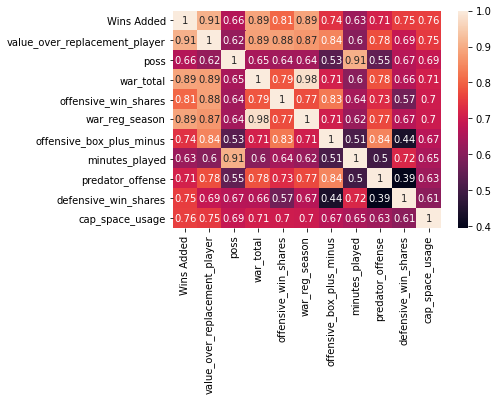

In [35]:
import seaborn as sns
sns.heatmap(pd.concat([X[features], y], axis=1).corr(), annot=True)